# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
#%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Importing the dataset from CSV file

In [2]:
iris_data = pd.read_csv(r"iris.csv")


In [3]:
iris_data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_data.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
iris_data.shape

(150, 5)

In [6]:
iris_data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# More information about dataset

In [7]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#Missing values
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
#Describing the species
iris_setosa = iris_data.loc[iris_data["species"]=="setosa"]
iris_setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [11]:
iris_versicolor = iris_data.loc[iris_data["species"]=="versicolor"]
iris_versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [12]:
iris_versicolor = iris_data.loc[iris_data["species"]=="versicolor"]
iris_versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000



# Scatter plot

Let's explore feature pairs using 2D scatter plots to see if we can visually distinguish the three flower classes.

C:\Users\ADMIN\anaconda3\envs\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


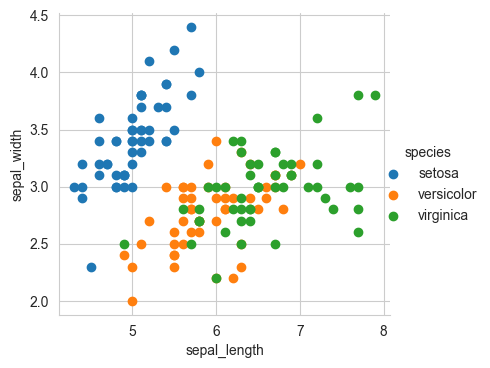

In [13]:
sns.set_style("whitegrid");
sns.FacetGrid(iris_data, hue="species", height=4).map(plt.scatter, "sepal_length", "sepal_width").add_legend();
plt.subplots_adjust(top=0.9, right=0.81, hspace=0.3, wspace=0.5)
plt.show();

Visualizing the Iris dataset reveals good separability between Setosa and the other two classes, Versicolor and Virginica. However, Versicolor and Virginica overlap significantly, making differentiation challenging. To further explore this, we'll analyze all possible pairwise combinations of the four features using scatter plots to identify optimal feature pairs for distinguishing all three classes.

# Pair Plots

# Pair plots shine when dealing with multiple features, as they efficiently present pairwise scatter plots with diagonal elements showcasing individual feature distributions (often depicted as probability density functions, or PDFs).

C:\Users\ADMIN\anaconda3\envs\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


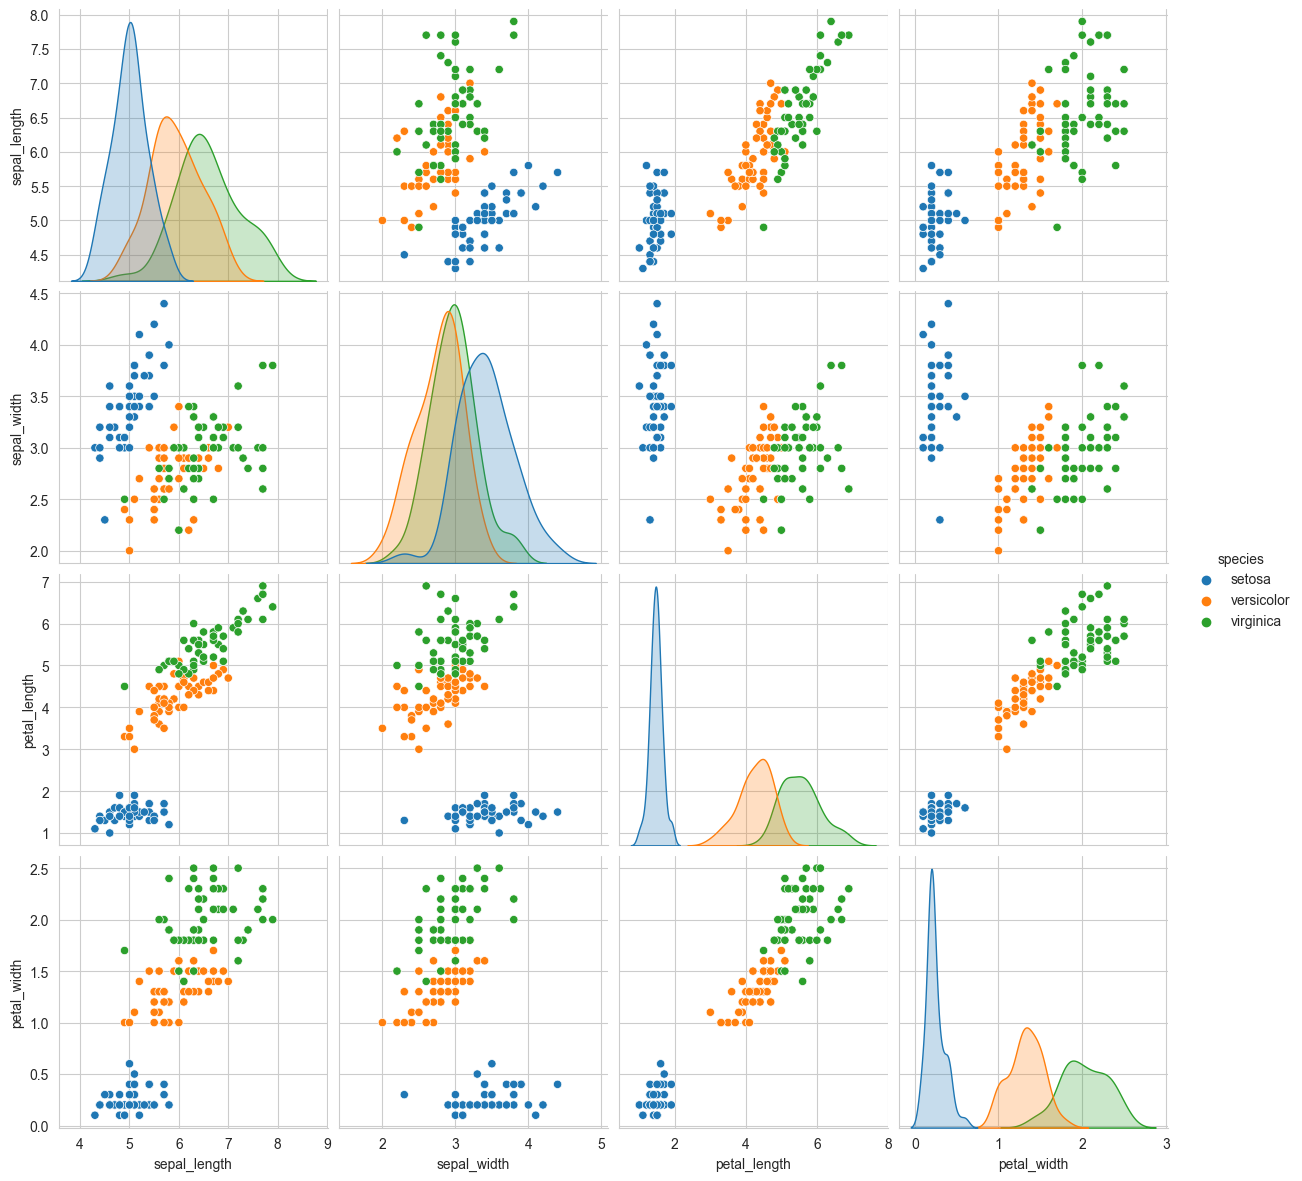

In [14]:
sns.set_style("whitegrid");
sns.pairplot(iris_data, hue="species",height=3);
plt.show();

Pair plots shine when dealing with multiple features, as they efficiently present pairwise scatter plots with diagonal elements showcasing individual feature distributions (often depicted as probability density functions, or PDFs).

C:\Users\ADMIN\anaconda3\envs\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


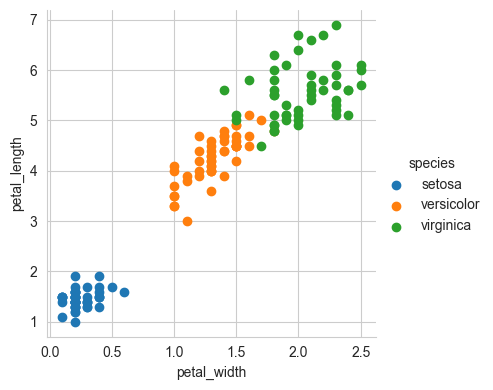

In [15]:
sns.set_style("whitegrid");
sns.FacetGrid(iris_data, hue="species", height=4) \
   .map(plt.scatter, "petal_width", "petal_length") \
   .add_legend();
plt.show();

Despite some overlap, we can visually distinguish the three iris classes to a reasonable extent, especially Setosa. This suggests the potential for a simple classification model. Using conditional logic based on petal width and length thresholds, we can create a rudimentary decision-making process to assign flowers to their respective classes (Setosa, Versicolor, Virginica) or indicate uncertainty if they fall outside defined ranges

Univaraite Analysis
Performing univariate analysis to understand which features are userful towards classification
1. Pdf - Probability density function
2. Cdf - Cumulative Distribution Function
3. Box plot
4. Violen plots
1-D scatter plot
In this plot we are just plotting point by taking x ccordinate or y ccordinate of a feature and making the other coordinate zero
1-D scatter plot of petal length

# 1-D scatter plot

In this plot we are just plotting point by taking x ccordinate or y ccordinate of a feature and making the other coordinate zero
1-D scatter plot of petal length

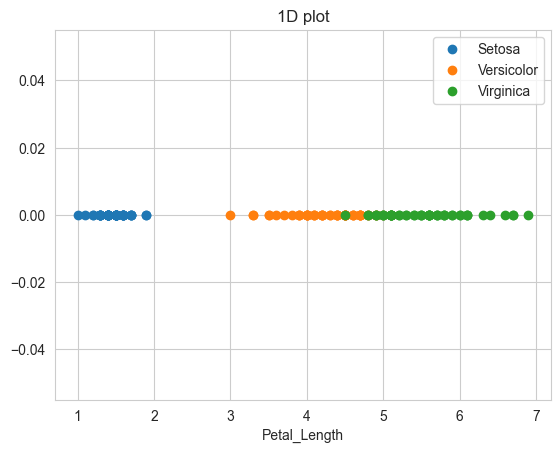

In [16]:
import numpy as np
iris_setosa = iris_data.loc[iris_data["species"] == "setosa"]
iris_versicolor = iris_data.loc[iris_data["species"] == "versicolor"]
iris_virginica = iris_data.loc[iris_data["species"] == "virginica"]

plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Petal_Length')
plt.title('1D plot')

plt.show()

Observation:
After performing 1-D scatter plot, it is clearly visible that the data points are overlapping and it is difficult to seperate the points

C:\Users\ADMIN\anaconda3\envs\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


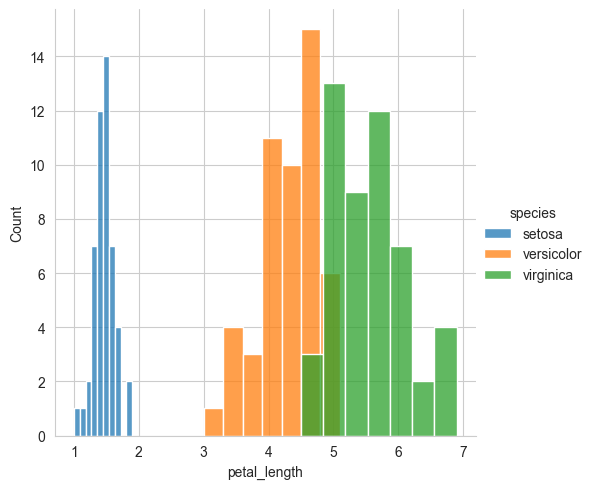

In [17]:
#Now Performing Histogram plot on the dataset taking a feature at a time 
#And then deciding which plot is more useful to classify it.
sns.FacetGrid(iris_data, hue="species", height=5) \
   .map(sns.histplot, "petal_length") \
   .add_legend();
plt.show();

C:\Users\ADMIN\anaconda3\envs\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


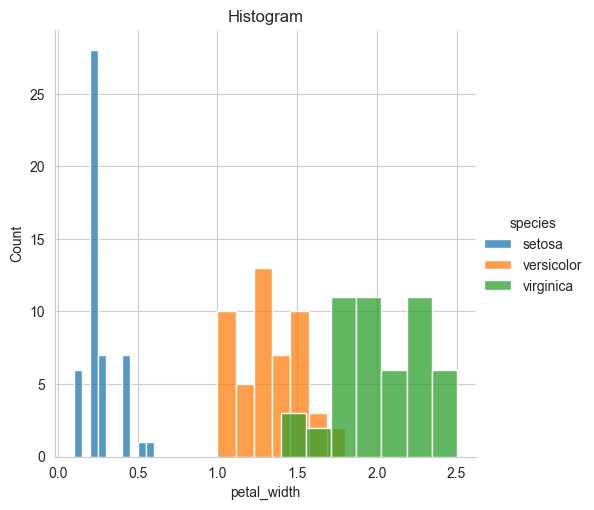

In [18]:
sns.FacetGrid(iris_data, hue="species", height=5) \
   .map(sns.histplot, "petal_width") \
   .add_legend();
plt.title("Histogram")
plt.show();

C:\Users\ADMIN\anaconda3\envs\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


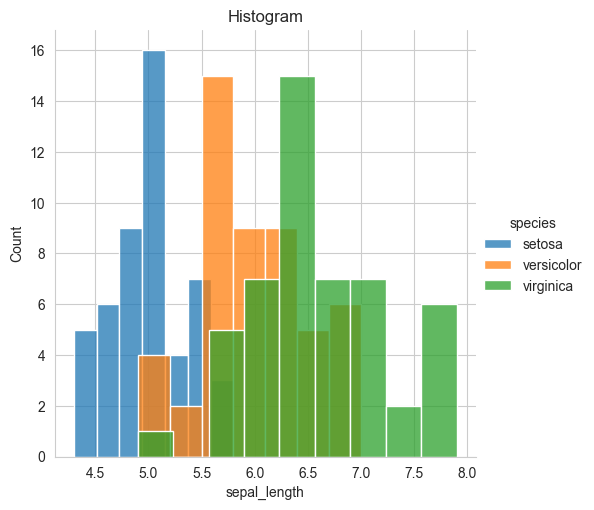

In [19]:
sns.FacetGrid(iris_data, hue="species", height=5) \
   .map(sns.histplot, "sepal_length") \
   .add_legend();
plt.title("Histogram")
plt.show();

C:\Users\ADMIN\anaconda3\envs\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


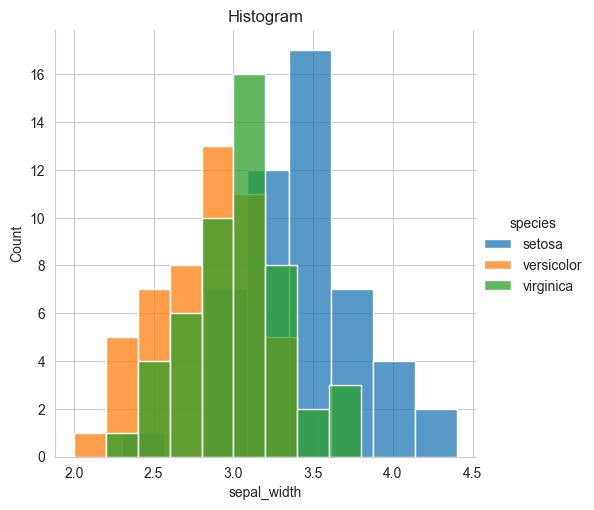

In [20]:
sns.FacetGrid(iris_data, hue="species", height=5) \
   .map(sns.histplot, "sepal_width") \
   .add_legend();
plt.title("Histogram")
plt.show();

# OBSERVATION

1. By performing histogram plot, it is clear that sepal_length and sepal width feature have many data points overlapping so it is difficult to build a model by taking these two feature.
2. Petal_length and petal_width is more beneficial while taking a plot
3. PL>PW>SL>SW this is the order which can be taken into consideration while classifying a dataset

# Now plotting CDF(cummulative distributive function) and PDF(Probability Density function)

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


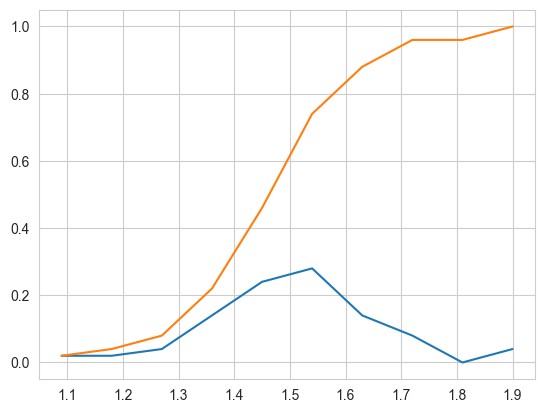

In [21]:
#  To visualize what percentage of dataset is under a limit
# Let say we have to know what percentage of datapoints of petal_length is under 1.6 then we have to use CDF

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density=True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


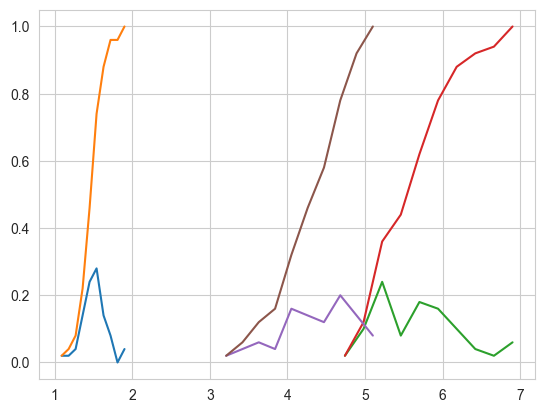

In [22]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density=True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
#============================================#
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, density=True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
#============================================#
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, density=True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

In [23]:
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

Means:
1.464
2.4156862745098038
5.5520000000000005
4.26

Std-dev:
0.17176728442867112
0.546347874526844
0.4651881339845203


In [24]:
#medians
print('\n!!! Medians !!!')
print(np.median(iris_setosa["petal_length"]))
#median with a outlier
print(np.median(np.append(iris_setosa["petal_length"],50)))
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))

#quantiles
print('\n !!! Quantiles !!!')
print(np.percentile((iris_setosa["petal_length"]),np.arange(0,100,25)))
print(np.percentile((iris_virginica["petal_length"]),np.arange(0,100,25)))      
print(np.percentile((iris_versicolor["petal_length"]),np.arange(0,100,25)))

#90's
print('\n!!! 90 percentile !!!')
print(np.percentile((iris_setosa["petal_length"]),90))
print(np.percentile((iris_virginica["petal_length"]),90))
print(np.percentile((iris_versicolor["petal_length"]),90))

#98's
print("\n!!! 98 percentile !!!")
print(np.percentile((iris_setosa["petal_length"]),98))
print(np.percentile((iris_virginica["petal_length"]),98))
print(np.percentile((iris_versicolor["petal_length"]),98))

#Mean absolute deviation
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))


!!! Medians !!!
1.5
1.5
5.55
4.35

 !!! Quantiles !!!
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

!!! 90 percentile !!!
1.7
6.31
4.8

!!! 98 percentile !!!
1.9
6.704
5.002

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


# Data Visualization

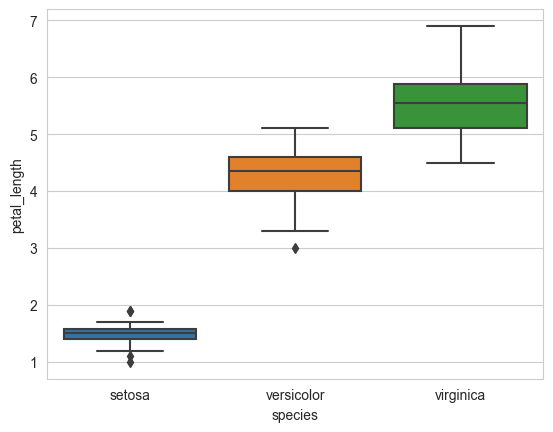

In [25]:
#BOX PLOT
sns.boxplot(x='species',y='petal_length', data=iris_data)
plt.show()

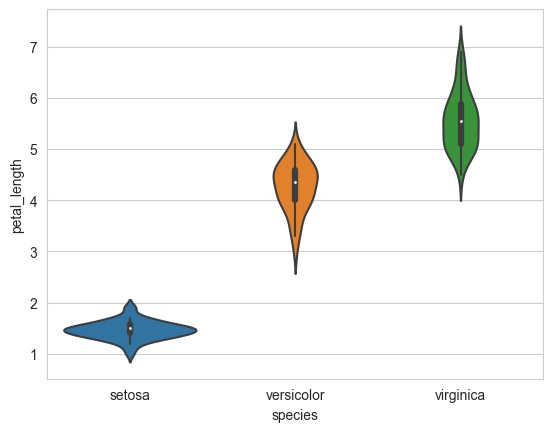

In [26]:
sns.violinplot(x="species", y="petal_length", data=iris_data, size=8)
plt.show()

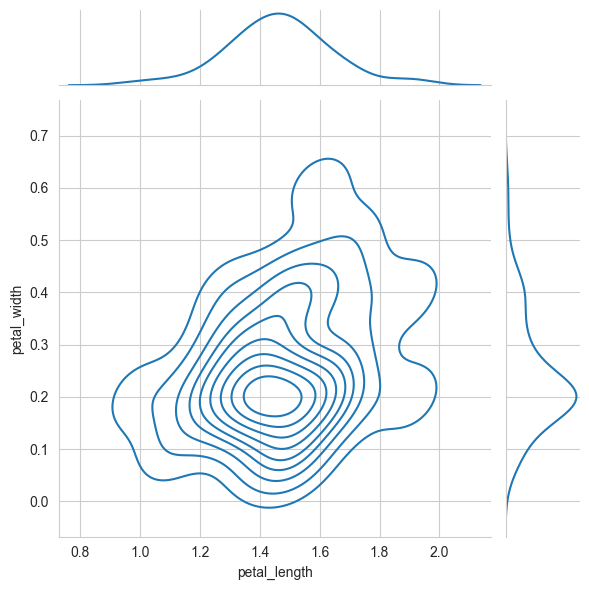

In [27]:
#2D Density plot, contors-plot
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();